# Multi class Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

# Obesity risk Prediction


In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Exploratory data analysis

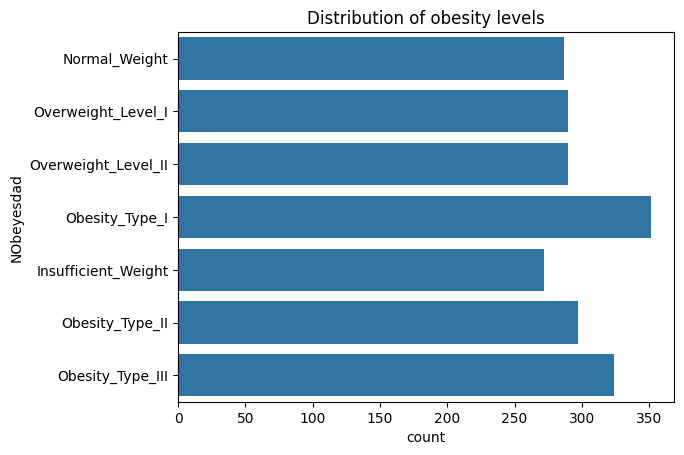

In [7]:
sns.countplot(y='NObeyesdad',data=data)
plt.title('Distribution of obesity levels')
plt.show()

In [10]:
print(data.isnull().sum())
print(data.info())
print(data.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

# feature scaling
scale the numerical features to standardize their ranges for better model

In [13]:
# Standardizing continous numerical features
continous_columns = data.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continous_columns])
# converting to a dataframe
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continous_columns))
# combining with the original dataset
scaled_data = pd.concat([data.drop(columns=continous_columns),scaled_df],axis=1)

# One-hot-encoding

In [17]:
# identifying categorical columns
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad') #extract target columns

# Applying one hot encoding 
encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# converting to dataframe
encoded_df = pd.DataFrame(encoded_features,columns=encoder.get_feature_names_out(categorical_columns))

# combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns),encoded_df],axis=1)

In [19]:
# encoding the target variable
prepped_data['NObeyesdad']=prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head(10)

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1,0.738817,-0.875589,-1.282647,-0.785019,0.404153,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1,-0.206889,-2.162001,-1.206267,1.088342,0.404153,-0.013073,-0.012109,-1.080625,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,1,-0.364507,-0.661187,-1.282647,-0.785019,0.404153,-0.013073,2.339750,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,1,-0.049271,0.839627,-0.862558,1.088342,0.404153,-0.013073,-0.012109,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1,-0.364507,0.196421,-0.709799,-0.785019,0.404153,-0.013073,-0.012109,0.561997,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
# separate the target variable
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# separate the input and target data
X = prepped_data.drop('NObeyesdad',axis=1)
y=prepped_data['NObeyesdad']

In [22]:
# splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [23]:
#training logistic regression model using one vs one 
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [24]:
y_pred_ovo =model_ovo.predict(X_test)

print("One vs One strategy")
print(f"Accuracy:{np.round(100*accuracy_score(y_test,y_pred_ovo),2)}%")


One vs One strategy
Accuracy:92.2%


In [25]:
model_ova=LogisticRegression(multi_class='ovr',max_iter=1000)
model_ova.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [28]:
y_pred_ova = model_ova.predict(X_test)

print("One-vs-All Strategy")
print(f"accuracy:{np.round(100*accuracy_score(y_test,y_pred_ova),2)}%")
                       

One-vs-All Strategy
accuracy:76.12%
